## COMP9321 25T3 Assignment 1 v1.1 (15 marks)

Airbnb is an online platform that allows hosts to advertise stays on the Airbnb website. The New York-based Housing Justice Data Lab maintains public datasets to help understand Airbnb's impact on residential communities.

This assignment uses modified Airbnb data for Sydney:

- `listings.csv`: Listing information to help people book stays.
- `reviews.csv`: Review data from guests, including comments and reviewer info.
- `neighbourhoods.geojson`: Geographic boundary data for Sydney neighbourhoods.

You can download all files in a zip file from: [https://drive.google.com/file/d/1ICB0P593g90gJZAd-Lyy4dKrjJ1reHJ_/view?usp=sharing]

### Assignment Instructions

Failure to follow these rules may result in penalties during marking. 

#### Environment Setup
- Use the provided `requirements.txt` to set up your virtual environment.
- Use only libraries available in the virtual environment (e.g., `pandas`, `matplotlib`).
- Use Python **3.13** only.

#### Your Answers!
In this assignment you will need to provide three types of answers as explained in each question:
- Dataframe/Table as an output
    - Use the code cell [https://jupyter-notebook.readthedocs.io/en/stable/notebook.html#code-cells] where you see **# YOUR CODE GOES HERE**. If the last line of your code is the result dataframe, the notebook will automatically display the results. 
- Plots (visualisations)
   - Use the code cell [https://jupyter-notebook.readthedocs.io/en/stable/notebook.html#code-cells] where you see **# YOUR CODE GOES HERE**. For plots/images you need to have **plt.show()** as the last line of your code. 
- Explanation
  - Use the markdown cell [https://jupyter-notebook.readthedocs.io/en/stable/notebook.html#markdown-cells] .

#### Coding Standards
- Do **not** use `for` or `while` loops over DataFrame rows or Series.
- Do **not** convert DataFrames to native Python types (`list`, `dict`) for processing.
- Plots/Dataframes answering the questions must be shown in the notebook output. For each question, there must be ONLY a single code cell to answer each question and its output should reflect your answer. You must make sure you include all outputs before subbmitting your notebook file. 
- Do **not** modify the provided code template structure; instead add your code where indicated by "YOUR CODE GOES HERE"
- You may write helper functions inside the code cell for the question where it is used.
- Pandas Operations- Your solutions should leverage efficient native Pandas operations (such as apply, drop, read_csv, etc.) rather than manual or iterative approaches. Additionally, ensure that DataFrames are properly indexed and sorted to enhance readability and facilitate easier data exploration. Finally, code efficiency and cleanliness are part of the marking critria.

#### Visualisation Standards
For questions 4, 5, and 6 make sure you:
- Choose a suitable chart type for the data.
- Use appropriate scale and colour.
- Include title, axis labels, and legend with readable sizing.
- Ensure the visualisation is self-explanatory and informative.
- You may use sub-plots inside one window to fit multiple visualisations.
#### Submission
- You can use WebCMS to submit your notebook file which should be named **zid.ipynb** (e.g., z123456.ipynb). You only need to submit the notebook file.
- Make sure you include all the outputs in the notebook file (run all cells before submisoion) otherwise you will be penalised by 50% of the question.
- Late submission is allowed with 5% penalty per day - You can submit no later than 5 days late.
- Link for submission: [https://webcms3.cse.unsw.edu.au/COMP9321/25T3/resources/114681]

## Run this prior to your question blocks.

In [8]:
# Make sure you copy the dataset files to the same directory as your notbook

import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 5)
pd.set_option('display.max_columns', None)
listings_df = pd.read_csv('listings.csv')
reviews_df = pd.read_csv('reviews.csv')
neighbourhoods_df = gpd.read_file('neighbourhoods.geojson')

# Question 1 (3 marks)

You need to clean both the **listings_df** and **reviews_df**  dataframes by applying best data wrangling practices. Included, but not limited to, checking for missing values, unexpected data types, removing unnecessary columns, setting proper index, and any obvious data quality issues. It is part of the assignment to explore the dataset and the assignment requirements (including all questions) and clean the dataset as much as you can.  

**Marking Criteria**
- [2 marks]  Properly cleaned dataframes using pandas operations.
- [1 mark]   Properly list all of the steps and why the step is required for a cleaned dataset - comments in the code.


In [9]:
# YOUR CODE GOES HERE - Clean the listings dataframe, name it (listings_df) and show the dataframe as output of your cell

def clean_columns(df: pd.DataFrame) -> pd.DataFrame:
    # clean columns name
    def norm(c):
        c = c.strip()
        c = c.replace('/', '_').replace(' ', '_').replace('__','_')
        c = c.replace('(', '').replace(')', '')
        return c.lower()
    df = df.rename(columns={c: norm(c) for c in df.columns})
    return df

# step 1: clean columns name, standardize naming conventions
listings_df = clean_columns(listings_df.copy())

cols_to_keep = [
    'id','name','price','room_type','neighbourhood_cleansed','latitude','longitude',
    'host_id', 'calculated_host_listings_count', 'host_response_rate', 'amenities', 'availability_30', 'review_scores_rating',
    'accommodates','bedrooms','beds','minimum_nights','maximum_nights',
    'number_of_reviews','reviews_per_month','last_scraped'
]

# step 2: remove unneccessary columns, focus on useful information
listings_df = listings_df[[c for c in cols_to_keep if c in listings_df.columns]].copy()

# step 3: clean the column of price, prepare for statistics
listings_df['price'] = (listings_df['price']
                   .astype(str)
                   .str.replace('[\$,]', '', regex=True)
                   .replace('nan', np.nan)
                   .astype(float))

# step 4: transfer date to datetime, prepare for statistics
listings_df['last_scraped'] = pd.to_datetime(listings_df['last_scraped'], errors='coerce')

# step 5: float latitude and longitude, prepare for statistics
for c in ['latitude','longitude']:
    listings_df[c] = pd.to_numeric(listings_df[c], errors='coerce')

# steo 6: change precent string to number, prepare for statistics
listings_df['host_response_rate'] = (
    listings_df['host_response_rate'].astype(str)
    .str.replace('%','', regex=False).str.strip()
    .pipe(pd.to_numeric, errors='coerce')
    .astype('float64')   
)

# step 7: delete duplicate id data, ensure uniqueness for the subsequent merge 
listings_df = (listings_df
                   .sort_values('last_scraped')
                   .drop_duplicates(subset=['id'], keep='last'))


# Do not change the following line of code (this will print the dataframe as an output after running the cell)
listings_df

,id,name,price,room_type,neighbourhood_cleansed,latitude,longitude,host_id,calculated_host_listings_count,host_response_rate,amenities,availability_30,review_scores_rating,accommodates,bedrooms,beds,minimum_nights,maximum_nights,number_of_reviews,reviews_per_month,last_scraped
0,11156,An Oasis in the City,65.0,private room,Sydney,-33.867670,151.22497,40855.0,1,NaN,"[""Refrigerator"", ""Dishwasher"", ""Kitchen"", ""Was...",28,4.59,1,1.0,1.0,90,180,193,1.02,2025-06-17
12061,1158673938618561514,Luxe Bronte Beach House,1500.0,entire home/apt,Waverley,-33.903000,151.26351,3231864.0,1,100.0,"[""Exterior security cameras on property"", ""Kit...",19,NaN,8,4.0,5.0,7,365,0,NaN,2025-06-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1474,15471190,PROS - Bula Luxury Villa at Balmoral Beach,978.0,entire home/apt,Mosman,-33.821890,151.25096,99141846.0,2,0.0,"[""Essentials"", ""Iron"", ""Kitchen"", ""Washer"", ""T...",29,4.00,8,4.0,5.0,90,1125,1,0.01,2025-06-18
7853,808262575565056173,Ultra modern Studio apartment in North Sydney,198.0,entire home/apt,North Sydney,-33.836161,151.20494,108083073.0,66,98.0,"[""Conditioner"", ""Refrigerator"", ""Kitchen"", ""Wa...",28,4.92,2,1.0,1.0,4,365,13,0.82,2025-06-18


In [10]:
# YOUR CODE GOES HERE - Clean the reviews dataframe, name it (reviews_df) and show the dataframe as output of your cell
reviews_df = clean_columns(reviews_df.copy())

# transfer date to datetime, prepare for statistics
reviews_df['date'] = pd.to_datetime(reviews_df['date'], errors='coerce')

# reviews_df no longer needs the review primary key id, to avoid confusion with the id in listings.
reviews_df = reviews_df.drop(columns=['id'])
    
# Do not change the following line of code
reviews_df

,listing_id,date,reviewer_id,reviewer_name,comments
0,11156,2009-12-05,52946,Jeff,Colleen was friendly and very helpful regardin...
1,11156,2010-03-31,99382,Michael,"Great place, centrally located, easy walk to t..."
...,...,...,...,...,...
670550,1421627348236436828,2025-05-22,662525224,Roland,Jonny was an excellent host…gave us advice on ...
670551,1421627348236436828,2025-06-09,51103659,Tamara,Had such a fantastic stay! Amazing location an...


In [11]:
# do not remove or modify this cell
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18187 entries, 0 to 7853
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              18187 non-null  int64         
 1   name                            18187 non-null  object        
 2   price                           15576 non-null  float64       
 3   room_type                       18187 non-null  object        
 4   neighbourhood_cleansed          18187 non-null  object        
 5   latitude                        18187 non-null  float64       
 6   longitude                       18187 non-null  float64       
 7   host_id                         18005 non-null  float64       
 8   calculated_host_listings_count  18187 non-null  int64         
 9   host_response_rate              14522 non-null  float64       
 10  amenities                       18187 non-null  object        
 11  availabi

In [12]:
# do not remove or modify this cell
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 670552 entries, 0 to 670551
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   listing_id     670552 non-null  int64         
 1   date           670552 non-null  datetime64[ns]
 2   reviewer_id    670552 non-null  int64         
 3   reviewer_name  670551 non-null  object        
 4   comments       670455 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 25.6+ MB


# Question 2 (2 marks)

Merge the cleaned listings and reviews dataframes into a single DataFrame. Join the result dataframe with the neighbourhoods dataset - the result dataframe should add two extra columns named 'latitude' and 'longitude' which show the centre of the neighbourhood. You should also clean the result dataframe. 

**Marking Criteria**
- [1 mark]  Join Listings and Reviews dataframes.
- [1 mark]  Join the result dataframe with the neighbourhoods dataset - the result dataframe should add two columns named 'latitude' and 'longitude' which shows the centre of the neighbourhood. these two columns replaces the existing 'latitude' and 'longitude' in the listings dataframe

In [13]:
# YOUR CODE GOES HERE - join all dataframes and name it merged_df

merged_df = listings_df.merge(reviews_df, how='left', left_on=['id'], right_on=['listing_id'], validate='one_to_many')

gdf = gpd.read_file('neighbourhoods.geojson').to_crs(epsg=4326)
gdf.columns = [c.lower() for c in gdf.columns]
centers = gdf.assign(
    latitude = gdf.geometry.centroid.y,
    longitude = gdf.geometry.centroid.x
)[['neighbourhood', 'latitude', 'longitude']]

merged_df = merged_df.rename(columns={'latitude':'listing_latitude',
                                          'longitude':'listing_longitude', 'neighbourhood_cleansed':'neighbourhood'})

merged_df = merged_df.merge(centers, on='neighbourhood', how='left')

merged_df



,id,name,price,room_type,neighbourhood,listing_latitude,listing_longitude,host_id,calculated_host_listings_count,host_response_rate,amenities,availability_30,review_scores_rating,accommodates,bedrooms,beds,minimum_nights,maximum_nights,number_of_reviews,reviews_per_month,last_scraped,listing_id,date,reviewer_id,reviewer_name,comments,latitude,longitude
0,11156,An Oasis in the City,65.0,private room,Sydney,-33.867670,151.22497,40855.0,1,NaN,"[""Refrigerator"", ""Dishwasher"", ""Kitchen"", ""Was...",28,4.59,1,1.0,1.0,90,180,193,1.02,2025-06-17,1.115600e+04,2009-12-05,52946.0,Jeff,Colleen was friendly and very helpful regardin...,-33.889671,151.202739
1,11156,An Oasis in the City,65.0,private room,Sydney,-33.867670,151.22497,40855.0,1,NaN,"[""Refrigerator"", ""Dishwasher"", ""Kitchen"", ""Was...",28,4.59,1,1.0,1.0,90,180,193,1.02,2025-06-17,1.115600e+04,2010-03-31,99382.0,Michael,"Great place, centrally located, easy walk to t...",-33.889671,151.202739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673729,808262575565056173,Ultra modern Studio apartment in North Sydney,198.0,entire home/apt,North Sydney,-33.836161,151.20494,108083073.0,66,98.0,"[""Conditioner"", ""Refrigerator"", ""Kitchen"", ""Wa...",28,4.92,2,1.0,1.0,4,365,13,0.82,2025-06-18,8.082626e+17,2024-12-30,22541234.0,Mark,the unit was spotless and really great and in ...,-33.832962,151.211862
673730,808262575565056173,Ultra modern Studio apartment in North Sydney,198.0,entire home/apt,North Sydney,-33.836161,151.20494,108083073.0,66,98.0,"[""Conditioner"", ""Refrigerator"", ""Kitchen"", ""Wa...",28,4.92,2,1.0,1.0,4,365,13,0.82,2025-06-18,8.082626e+17,2025-01-04,33235618.0,가영,Good,-33.832962,151.211862


# Question 3 (2 marks)
Airbnb wants to better understand how the scale of a host's operation (i.e. the number of listings they manage) affects key business metrics such as pricing, availability, and guest experience — particularly in relation to the amenities they offer.

You are tasked with building a pivot table that summarises host performance per amenity and per host segment.

- Small Portfolio: 1 listing
- Medium Portfolio: 2–5 listings
- Large Portfolio: 6–10 listings
- Enterprise Portfolio: 10+ listings

Using the provided Airbnb dataset, your task is to:
- Focus on a shortlist of key amenities:
    - WiFi, Kitchen, Air conditioning, Heating, TV, Washer, Free parking
- Create a pivot table that shows, for each combination of host segment and amenity:
    - Average nightly price
    - Average availability in the next 30 days
    - Average review score rating

**Marking Criteria**
- [1 mark]  A proper dataframe as an output to fullfil the requirement.
- [1 mark]  Interpretation of your results and justification of your analysis—explain what conclusions you can draw from the results.

In [14]:
# YOUR CODE GOES HERE - your pivot table should be named summary - All of the rows of this table should be shown

df = listings_df.copy()
host_cnt = df['calculated_host_listings_count']

cond = [
    host_cnt.eq(1),
    host_cnt.between(2, 5),
    host_cnt.between(6, 10),
    host_cnt.ge(11)
]
labels = ['Small', 'Medium', 'Large', 'Enterprise']
df['host_segment'] = np.select(cond, labels, default='Unknown')

amen = df['amenities'].fillna('').str.lower()
patterns = {
    'WiFi': r'wifi',
    'Kitchen': r'kitchen',
    'Air conditioning': r'air\s*conditioning',
    'Heating': r'heating',
    'TV': r'\btv\b',
    'Washer': r'washer',
    'Free parking': r'free\s*parking'
}
for label, pat in patterns.items():
    df[label] = amen.str.contains(pat, na=False, regex=True)

keep_cols = ['host_segment', 'price', 'availability_30', 'review_scores_rating'] + list(patterns.keys())
long = (
    df[keep_cols]
    .melt(id_vars=['host_segment','price','availability_30','review_scores_rating'],
          value_vars=list(patterns.keys()),
          var_name='amenity', value_name='has_amenity')
)
long = long[long['has_amenity']].drop(columns=['has_amenity'])
summary = (
    long
    .groupby(['host_segment','amenity'], dropna=False)
    .agg(
        avg_price=('price','mean'),
        avg_availability_30=('availability_30','mean'),
        avg_review_score=('review_scores_rating','mean')
    )
    .round(2)
    .sort_index()
)

# Do not change the following lines of code
pd.set_option('display.max_rows', 50)
summary

avg_price  avg_availability_30  \
host_segment amenity                                            
Enterprise   Air conditioning     409.54                13.96   
             Free parking         418.90                14.36   
             Heating              380.38                13.77   
             Kitchen              359.73                13.94   
             TV                   405.94                14.03   
             Washer               358.20                13.87   
             WiFi                 362.39                14.20   
Large        Air conditioning     331.96                14.44   
             Free parking         406.04                13.99   
             Heating              327.98                14.40   
             Kitchen              325.35                13.81   
             TV                   309.94                14.51   
             Washer               322.88                13.84   
             WiFi                 316.43                14.40   
Medium       Air conditioning     308.88                13.99   
             Free parking         331.45                14.61   
             Heating              291.88                13.84   
             Kitchen              288.64                13.96   
             TV                   301.88                14.37   
             Washer               288.84                13.92   
             WiFi                 282.74                14.15   
Small        Air conditioning     398.48                14.15   
             Free parking         419.49                14.92   
             Heating              375.51                13.62   
             Kitchen              362.25                14.04   
             TV                   372.40                14.31   
             Washer               364.57                14.02   
             WiFi                 355.12                13.99   

                               avg_review_score  
host_segment amenity                             
Enterprise   Air conditioning              4.60  
             Free parking                  4.59  
             Heating                       4.61  
             Kitchen                       4.56  
             TV                            4.60  
             Washer                        4.55  
             WiFi                          4.56  
Large        Air conditioning              4.66  
             Free parking                  4.68  
             Heating                       4.67  
             Kitchen                       4.67  
             TV                            4.65  
             Washer                        4.67  
             WiFi                          4.66  
Medium       Air conditioning              4.74  
             Free parking                  4.73  
             Heating                       4.75  
             Kitchen                       4.75  
             TV                            4.74  
             Washer                        4.75  
             WiFi                          4.74  
Small        Air conditioning              4.83  
             Free parking                  4.82  
             Heating                       4.85  
             Kitchen                       4.82  
             TV                            4.82  
             Washer                        4.82  
             WiFi                          4.83

### Interpretation of Results for Question 3 - 

This graph shows us:

- Enterprise hosts show higher average prices across most amenities (e.g., Free parking ≈ 418.90 vs. ≈ 331.45 for Medium), suggesting larger hosts tend to price higher.

- Availability_30 is similar across segments (around ~14 days), indicating comparable availability over the next 30 days.

- Ratings vary slightly by scale: Small hosts typically score higher (~4.82–4.85), while Enterprise is a bit lower (~4.55–4.61), possibly reflecting differences between personalized service and standardized operations.

- By amenity, Free parking / Air conditioning / TV are often associated with higher average prices, consistent with greater pricing power.


# Question 4 (2.5 marks)

Provide two actionable recommendations supported by appropriate chart(s):
- One for new hosts entering the market
- One for existing hosts to improve performance

**Marking Criteria:**
- [2 marks] The recommendations are actionable and valuable to the stakeholder to achieve their objectives. Add comments to explain the results.
- [0.5 marks] The visualisation maintains a professional standard of visual quality, clarity, formatting, and correctness.



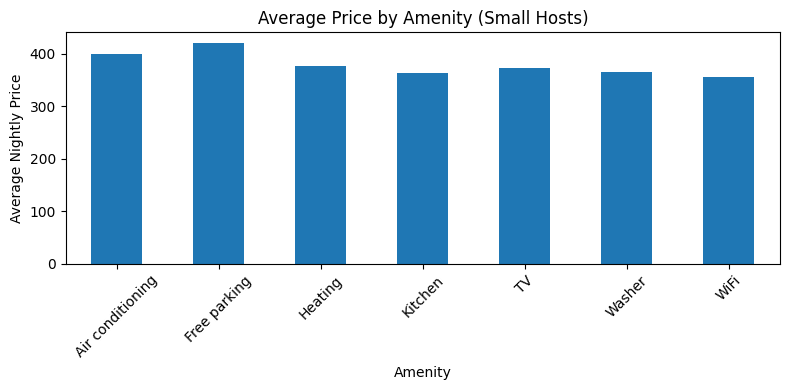

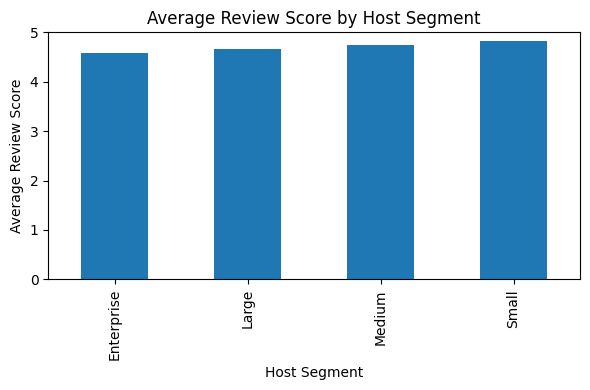

In [15]:
# YOUR CODE GOES HERE - your visualisation must be shown as an output at the end of this cell 
#                      (do not store the image - it should be showon after this cell once you run this cell)

_s = summary.copy()
_s = _s.reset_index()
small = (_s[_s['host_segment'].astype(str).str.lower().eq('small')]
         .sort_values('amenity'))
seg_rating = (_s.groupby('host_segment', as_index=False)['avg_review_score']
                .mean()
                .sort_values('host_segment'))

fig, ax = plt.subplots(figsize=(8,4))
small.plot(x='amenity', y='avg_price', kind='bar', legend=False, ax=ax)
ax.set_title('Average Price by Amenity (Small Hosts)')
ax.set_xlabel('Amenity'); ax.set_ylabel('Average Nightly Price')
ax.tick_params(axis='x', rotation=45)
fig.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(6,4))
seg_rating.plot(x='host_segment', y='avg_review_score', kind='bar', legend=False, ax=ax)
ax.set_title('Average Review Score by Host Segment')
ax.set_xlabel('Host Segment'); ax.set_ylabel('Average Review Score')
ax.set_ylim(0,5)
fig.tight_layout()
plt.show()


### Explanation of Results for Question 4

Some advices from the data:

- For new hosts: Equip Free parking / Air conditioning / TV to capture a price premium. Anchor nightly price around the Small-segment median for that amenity and discount by 3–5% to accelerate initial bookings and reviews.

- For existing hosts: Large/Enterprise hosts trail in ratings; close the gap by ensuring Heating/Washer coverage and standardizing pre/post-stay messaging (≤1h response SLA). When rating ≥ 4.8 and availability_30 is below segment average, apply a 3–7% price uplift.

# Question 5 (2.5 marks)

Airbnb would like to investigate whether the timing of reviews and the quality of listings impact user engagement. As a data analyst, your task is to verify or challenge the following claim:

“Listings tend to receive more reviews during weekends and public holidays in NSW. Additionally, listings with higher ratings tend to attract more reviews and are managed by hosts with higher response rates.”

**Marking Criteria:**
- [2 marks] The analysis/charts effectively identify trends and patterns.
- [0.5 marks] The visualisation maintains a professional standard of visual quality, clarity, formatting, and correctness.



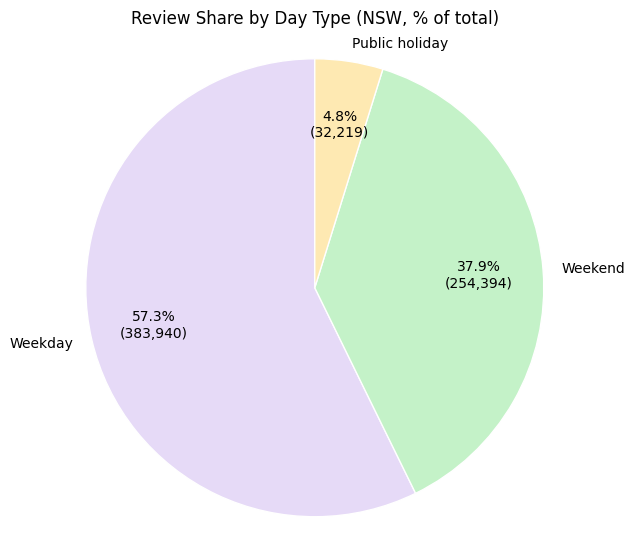

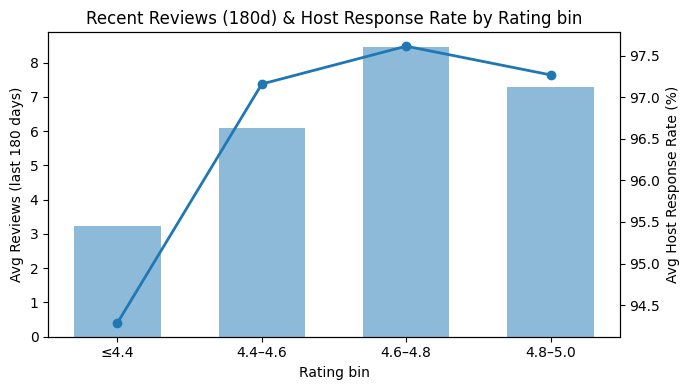

In [16]:
# YOUR CODE GOES HERE - your visualisation must be shown as an output at the end of this cell 
#                      (do not store the image - it should be showon after this cell once you run this cell)

import holidays

# --- day type (weekday / weekend / public holiday) ---
R = reviews_df.dropna(subset=['date']).copy()
R['is_weekend'] = R['date'].dt.weekday >= 5

cat_order = ['Weekday', 'Weekend', 'Public holiday']

nsw = holidays.Australia(prov='NSW', years=sorted(R['date'].dt.year.unique()))
R['is_public_holiday'] = R['date'].isin(pd.to_datetime(list(nsw.keys())))

R['day_type'] = np.select(
    [R['is_public_holiday'], R['is_weekend']],
    ['Public holiday', 'Weekend'],
    default='Weekday'
)

reviews_by_type = (R['day_type'].value_counts()
                   .reindex(cat_order)
                   .fillna(0)
                   .astype(int)
                   .rename('review_count'))
share_by_type   = (reviews_by_type / reviews_by_type.sum() * 100).round(1)

# --- Recent 180-day reviews per listing ---
end = R['date'].max()
start = end - pd.Timedelta(days=180)
R_180 = R[(R['date'] >= start) & (R['date'] <= end)]

recent_counts = (R_180.groupby('listing_id').size().rename('reviews_180').reset_index())

L = listings_df.copy()
L = L.merge(recent_counts, left_on='id', right_on='listing_id', how='left')
L['reviews_180'] = L['reviews_180'].fillna(0)

rating_bins = pd.cut(
    L['review_scores_rating'],
    bins=[0, 4.4, 4.6, 4.8, 5.0],
    labels=['≤4.4','4.4–4.6','4.6–4.8','4.8–5.0'],
    include_lowest=True, right=True
)

rating_summary = (
    pd.DataFrame({'rating_bin': rating_bins,
                  'reviews_recent': L['reviews_180'],
                  'host_response_rate': L['host_response_rate']})
      .dropna(subset=['rating_bin'])
      .groupby('rating_bin', as_index=False)
      .agg(avg_reviews=('reviews_recent','mean'),
           avg_response_rate=('host_response_rate','mean'))
)

# --- Figure 1: reviews by day type ---
vals_pct = share_by_type.reindex(cat_order).to_numpy()
vals_cnt = reviews_by_type.reindex(cat_order).to_numpy()

colors = ['#E6DAF7', '#C4F2C8', '#FEE9B2']

def make_autopct(counts):
    total = counts.sum()
    def _fmt(pct):
        n = int(round(pct/100 * total))
        return f"{pct:.1f}%\n({n:,})"
    return _fmt

fig1, ax1 = plt.subplots(figsize=(6.5,6.5))
ax1.pie(
    vals_pct,
    labels=cat_order,
    autopct=make_autopct(vals_cnt),
    startangle=90,
    colors=colors,
    pctdistance=0.72,     
    labeldistance=1.08,     
    wedgeprops=dict(edgecolor='white', linewidth=1), 
)

ax1.set_title("Review Share by Day Type (NSW, % of total)", pad=10)
ax1.axis('equal')

# --- Figure 2: rating bin — reviews (bar) & response rate (line) ---
x2 = np.arange(len(rating_summary))
fig2, ax2 = plt.subplots(figsize=(7,4))
ax2.bar(x2, rating_summary['avg_reviews'], width=0.6, alpha=0.5, zorder=1)
ax2.set_xlabel('Rating bin'); ax2.set_ylabel('Avg Reviews (last 180 days)')
ax2.set_xticks(x2); ax2.set_xticklabels(rating_summary['rating_bin'].astype(str))
ax2.set_title('Recent Reviews (180d) & Host Response Rate by Rating bin')

ax2b = ax2.twinx()
ax2b.plot(x2, rating_summary['avg_response_rate'], marker='o', linewidth=2, zorder=3)
ax2b.set_ylabel('Avg Host Response Rate (%)')

fig2.tight_layout()
plt.show()


### Explanation of Results for Question 5

- From Figure 1, we see that 57.3% of reviews are posted on weekdays, so the claim that “listings tend to receive more reviews during weekends and public holidays in NSW” is not true.
- From Figure 2, when ratings are in [0, 4.8], both the number of reviews received in the last 180 days and the average host response rate increase as ratings rise. However, in the (4.8, 5.0] range, both metrics decline. Therefore, the statement “listings with higher ratings tend to attract more reviews and are managed by hosts with higher response rates” is not entirely correct.


# Question 6 (3 marks)

Create visualisation(s) to outline notable points to the community about the price distributions in Sydney based on listing and neighbourhood information.


**Marking Criteria:**
- [2.5 marks] The visualisation has depth and relevance to the community about price distributions in Sydney.
- [0.5 marks] The visualisation maintains a professional standard of visual quality, clarity, formatting, and correctness.

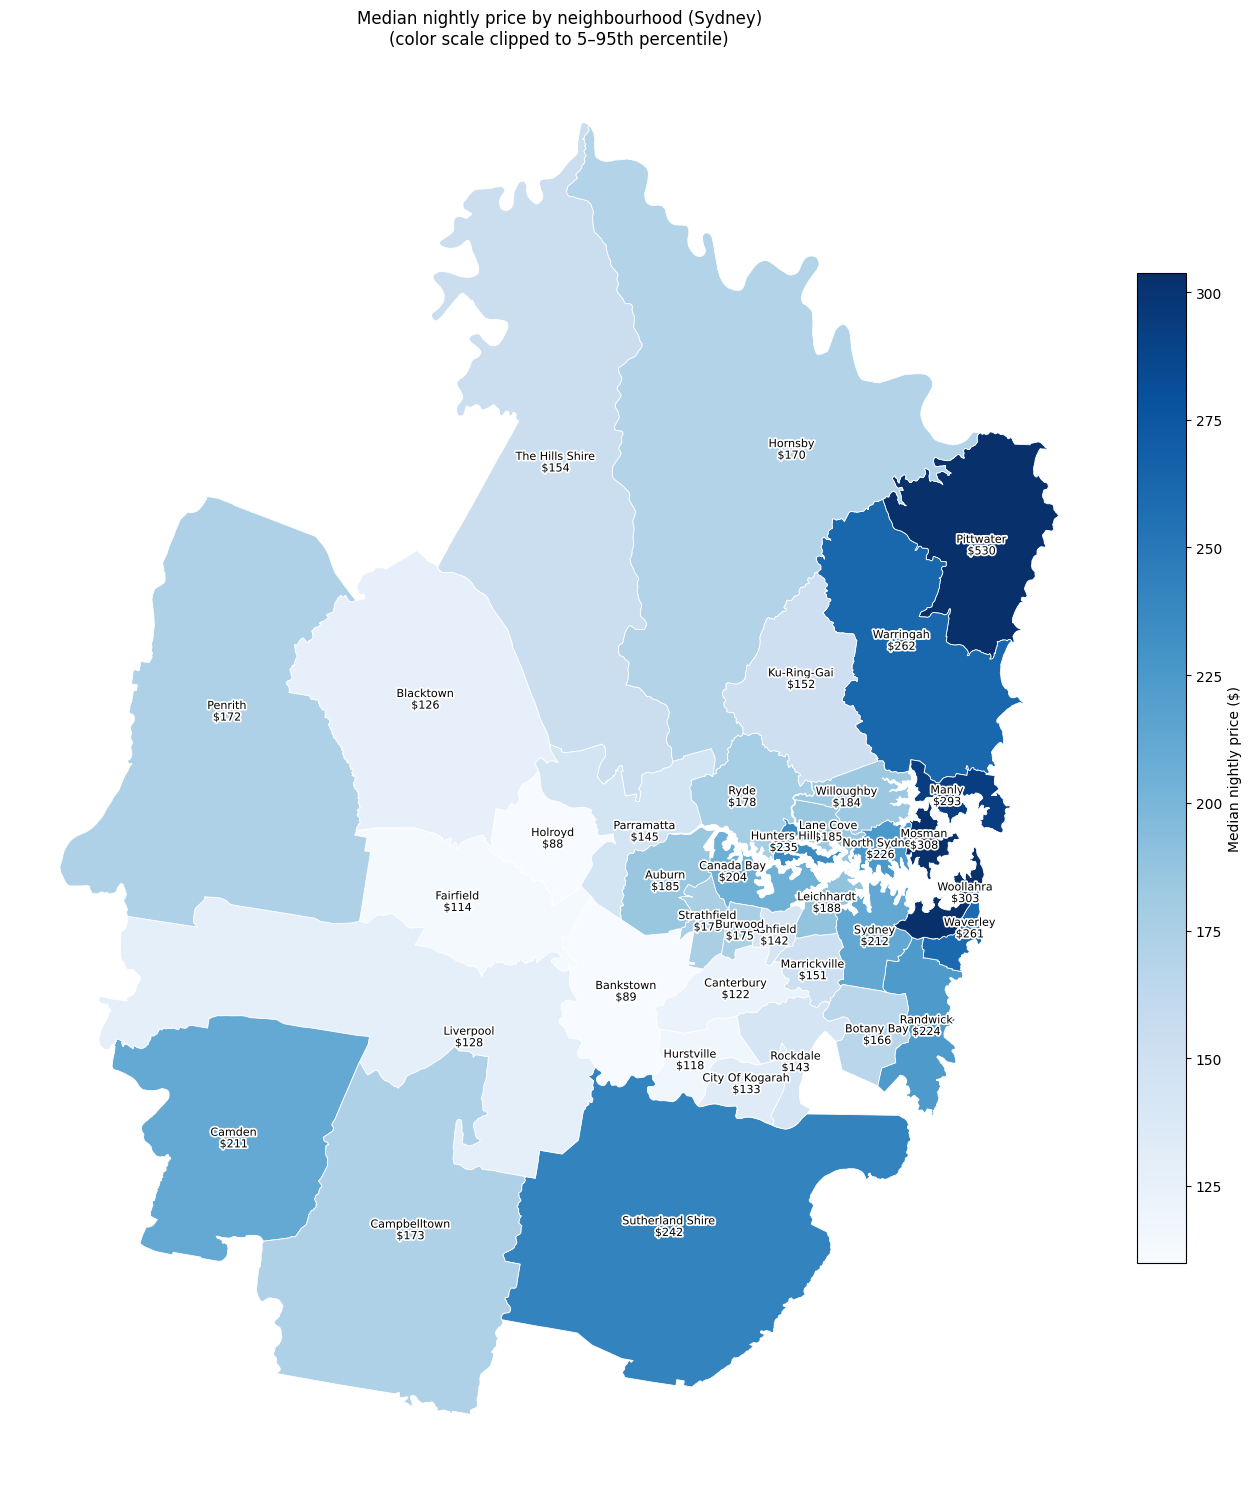

In [17]:
# YOUR CODE GOES HERE - your visualisation must be shown as an output at the end of this cell 
#                      (do not store the image - it should be showon after this cell once you run this cell)

import matplotlib as mpl
import matplotlib.patheffects as pe

gdf = gpd.read_file('neighbourhoods.geojson')

# keep positive values
L_vis = listings_df.loc[listings_df['price'].gt(0)].copy()

def norm(s):
    return (s.astype(str).str.strip().str.lower())

median_price = (
    L_vis.assign(_neigh=norm(L_vis['neighbourhood_cleansed']))
         .groupby('_neigh', dropna=False)['price']
         .median()
         .rename('median_price')
         .reset_index()
)

gdf['_neigh'] = norm(gdf['neighbourhood'])
gdf_merged = gdf.merge(median_price, on='_neigh', how='left')

label_points = gdf_merged.geometry.representative_point()
label_xy = np.column_stack([label_points.x, label_points.y])

# color scale range: 5% - 95%
vmin = np.nanpercentile(gdf_merged['median_price'], 5)
vmax = np.nanpercentile(gdf_merged['median_price'], 95)
norm_c = mpl.colors.Normalize(vmin=vmin, vmax=vmax)


fig, ax = plt.subplots(figsize=(15, 15))
gdf_merged.plot(column='median_price',
                cmap='Blues',
                norm=norm_c,   
                legend=False,    
                edgecolor='white', linewidth=0.6,
                ax=ax)

sm = mpl.cm.ScalarMappable(norm=norm_c, cmap='Blues')
sm.set_array([]) 
cb = plt.colorbar(sm, ax=ax, fraction=0.035, pad=0.02)
cb.set_label('Median nightly price ($)')

names = gdf_merged['neighbourhood'].astype(str).values
vals  = gdf_merged['median_price'].to_numpy()
for (x, y), name, val in zip(label_xy, names, vals):
    if np.isnan(val):
        continue
    ax.text(x, y, f"{name}\n${val:,.0f}",
            ha='center', va='center', fontsize=8,
            path_effects=[pe.withStroke(linewidth=2.5, foreground='white')])

ax.set_title('Median nightly price by neighbourhood (Sydney)\n(color scale clipped to 5–95th percentile)', pad=10)
ax.set_axis_off()
plt.tight_layout()

plt.show()


### Explanation of Results for Question 6

Median nightly prices are highest along Sydney’s north/east coast—especially Pittwater (~$530), then Mosman/Manly/Warringah—and much lower in western/south-western suburbs (~$90–$145). This shows a clear coast → west price gradient, likely driven by beachfront housing and leisure demand. Medians are used (robust to outliers), and the colour scale is clipped to the 5–95th percentiles for readability.